# Introducción a Problemas de Regresión con Machine Learning

## Información del dataset y contexto

**Conjunto de datos de resistencia a la compresión del hormigón**

```
I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
```
A continuación se presenta el nombre de la variables, su tipo, la unidad de medida y una breve descripción. La resistencia a compresión del concreto es el problema de regresión a tratar. El orden de este listado corresponde al orden de los números a lo largo de las filas de la base de datos.

**Name -- Data Type -- Measurement -- Description**

*   Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Age -- quantitative -- Day (1~365) -- Input Variable
*   Concrete compressive strength -- quantitative -- MPa -- Output Variable

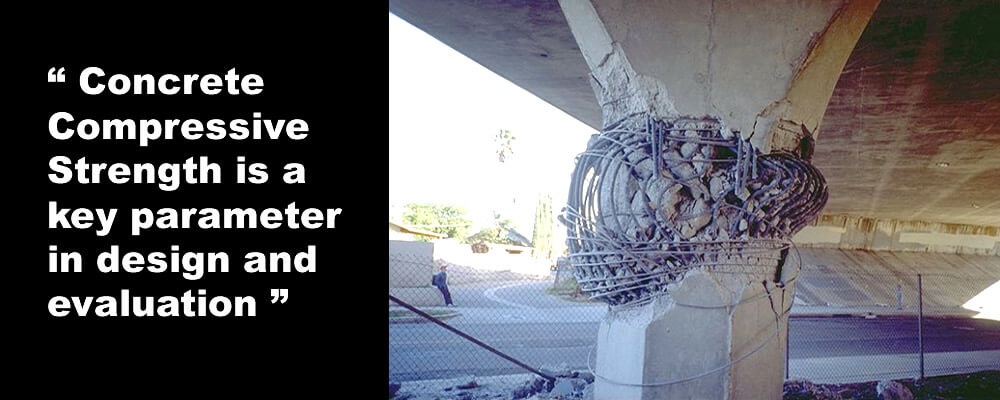

https://www.fprimec.com/how-to-evaluate-compressive-strength-of-concrete/

## Librerías Generales

In [1]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Análisis Exploratorio de Datos

In [2]:
# Dataset desde el repositorio en Drive
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II&confirm=t" -O dataset_hormigon_regresion.zip

--2023-11-03 23:38:13--  https://drive.google.com/uc?export=download&id=1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II&confirm=t
Resolving drive.google.com (drive.google.com)... 173.194.218.139, 173.194.218.100, 173.194.218.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c8d8ccma9ubcd0p2pi7pfoctl91pi68d/1699054650000/12225850433951268217/*/1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II?e=download&uuid=79fe4005-16af-4437-bca9-fb662f7f4ae2 [following]
--2023-11-03 23:38:14--  https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c8d8ccma9ubcd0p2pi7pfoctl91pi68d/1699054650000/12225850433951268217/*/1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II?e=download&uuid=79fe4005-16af-4437-bca9-fb662f7f4ae2
Resolving doc-0s-9c-docs.googleusercontent.com (doc-0s-9c-docs.googleusercontent.com)... 142.251

In [3]:
!unzip dataset_hormigon_regresion.zip

Archive:  dataset_hormigon_regresion.zip
  inflating: dataset_hormigon_regresion.csv  


In [4]:
# Lectura del dataset
dataset = pd.read_csv("dataset_hormigon_regresion.csv")

In [5]:
dataset

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
dataset.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
# Para ver si existen filas con la misma información
dataset.duplicated().sum()

0

In [9]:
# Quitamos las repetidas
dataset.drop_duplicates(inplace=True)

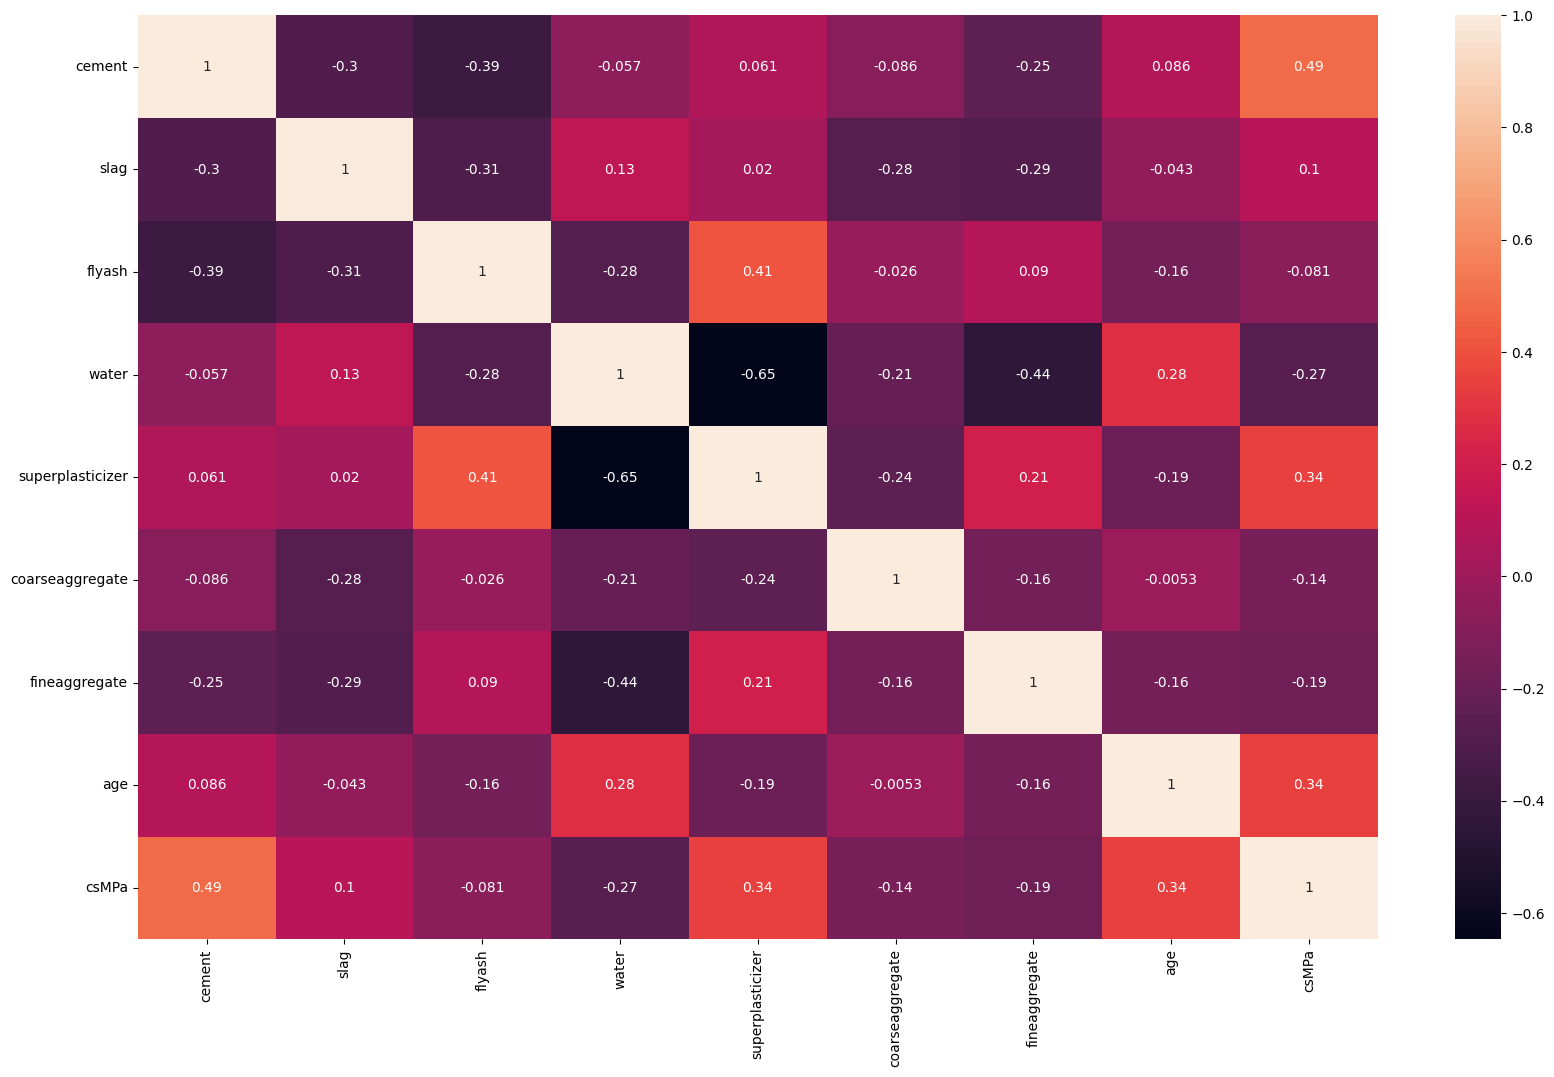

In [12]:
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

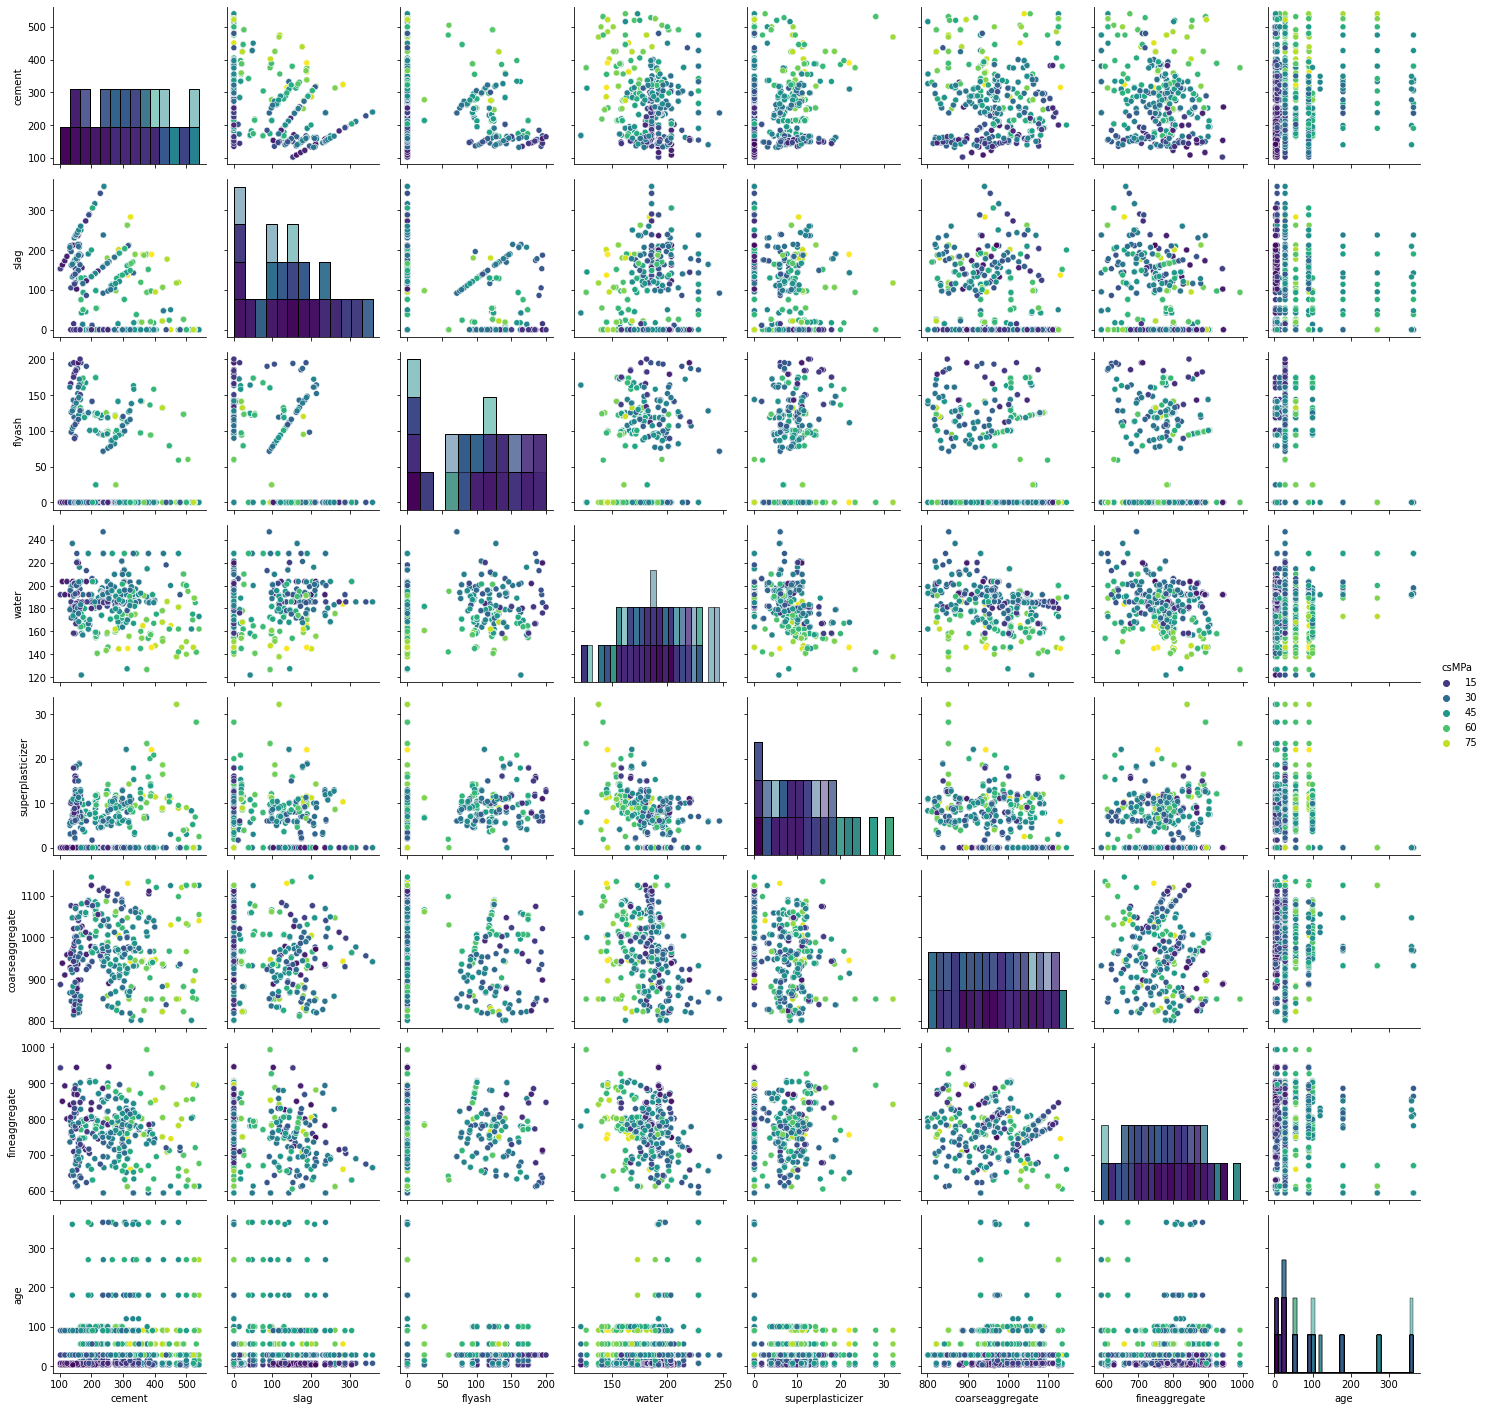

In [ ]:
g = sns.PairGrid(dataset, hue="csMPa", palette='viridis')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Preprocesamiento

In [13]:
# Definimos Entradas y Salidas
X = dataset.drop('csMPa', axis=1)    #drop quita una columna de un dataframe, y devuelve otra dataframe
y = dataset['csMPa']                 #Asignamos únicamente la columna de interés

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Selección de Modelo

### Regresión Lineal

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Los modelos basados en una ecuación, permiten ver los pesos finales
lr.coef_

array([ 0.10764096,  0.09327761,  0.07372318, -0.16717204,  0.38922739,
        0.01165752,  0.01336094,  0.11645039])

In [17]:
# Construimos un DataFrame para visulizar a qué variable corresponde cada peso
df_coef = pd.DataFrame(data=lr.coef_, index=X.columns, columns=['Coeficientes'])
df_coef

,Coeficientes
cement,0.107641
slag,0.093278
flyash,0.073723
water,-0.167172
superplasticizer,0.389227
coarseaggregate,0.011658
fineaggregate,0.013361
age,0.116450


In [18]:
pred_lr = lr.predict(X_test)

Text(0, 0.5, 'y_test')

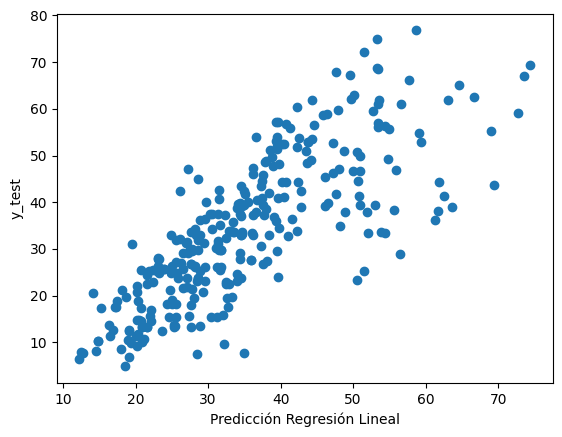

In [19]:
# Gráfica de resultados
# Relación entre el valor predicho y el valor real de la prueba en representación gráfica
plt.scatter(x=pred_lr, y=y_test)

plt.xlabel('Predicción Regresión Lineal')
plt.ylabel('y_test')
# No existe una fuerte relación lineal entre el valor predicho y el valor real, lo que muestra que la precisión del modelo es pobre.

Evaluación del Modelo

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_lr)))
print('R squared: ', r2_score(y_test, pred_lr))

RMSE:  9.678727677938797
R squared:  0.6182430128820215


**Repaso Estadística:**

El valor de R-cuadrado es 61,8 %, lo que indica que alrededor del 61,8 % de la proporción de la variabilidad en los datos se puede explicar mediante un modelo de regresión lineal, es el parámetro más importante para la evaluación del modelo. Cuanto mayor sea el valor, mejor será el ajuste.

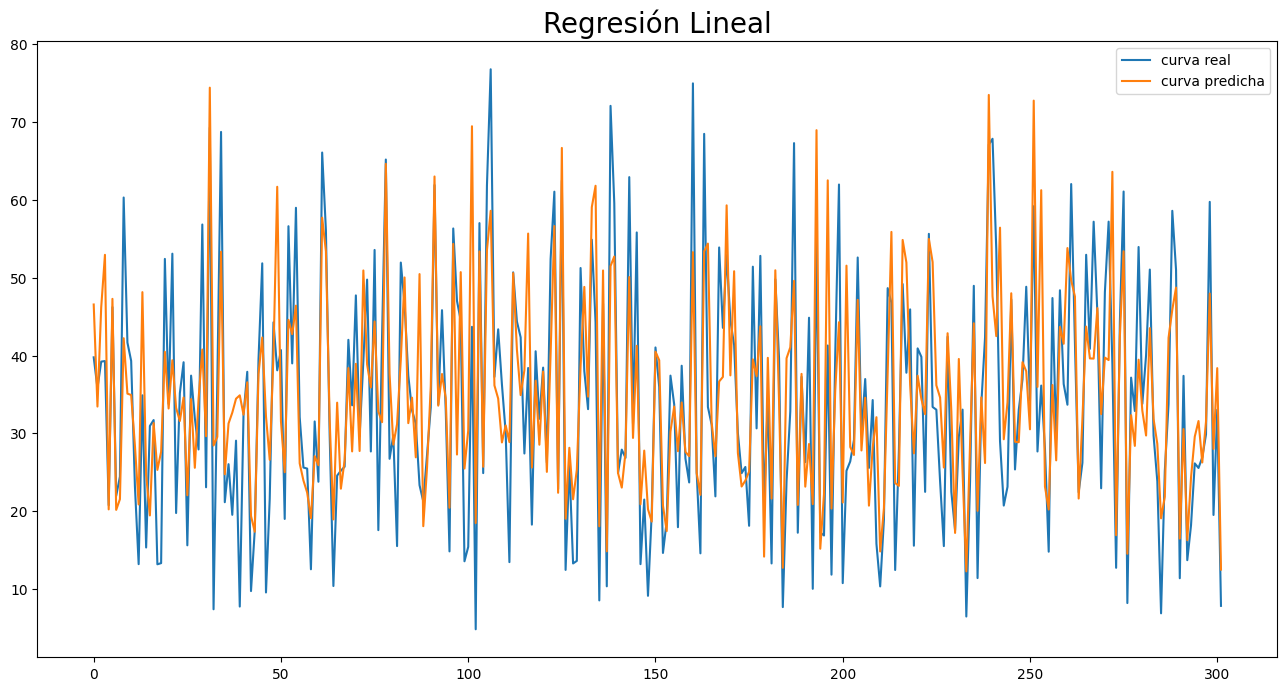

In [22]:
# Comparación de la salida real vs predicha
plt.figure(figsize=(16,8))

# Crearemos una trama usando datos etiquetados (los reales del dataset)
plt.plot(np.arange(len(X_test)), y_test.values, label='curva real')

# Crearemos una trama usando datos predichos
plt.plot(np.arange(len(X_test)), pred_lr, label='curva predicha')

plt.title('Regresión Lineal', fontsize=20)
plt.legend()

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Regresión aleatoria con 'n_estimators' árboles secundarios
rf = RandomForestRegressor(n_estimators=60, random_state=111)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

Text(0, 0.5, 'y_test')

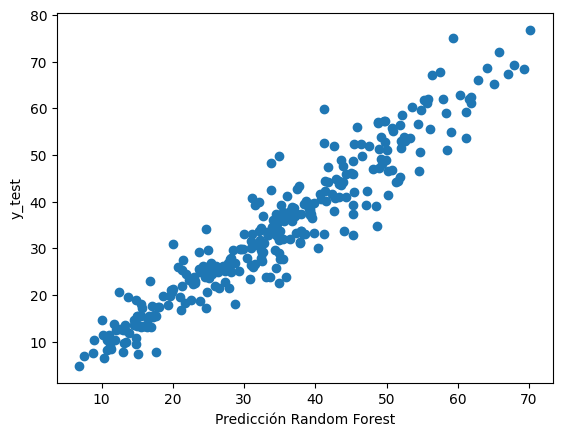

In [24]:
# Gráfica de resultados
# Relación entre el valor predicho y el valor real de la prueba en representación gráfica
plt.scatter(x=pred_rf, y=y_test)

plt.xlabel('Predicción Random Forest')
plt.ylabel('y_test')
# La relación lineal entre el valor predicho y el valor real, ahora es mucho más fuerte que en el modelo anterior.
# Esto denota que la precisión del modelo es buena.

In [25]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf)))
print('R squared: ', r2_score(y_test, pred_rf))

RMSE:  4.813294215894264
R squared:  0.905586244866427


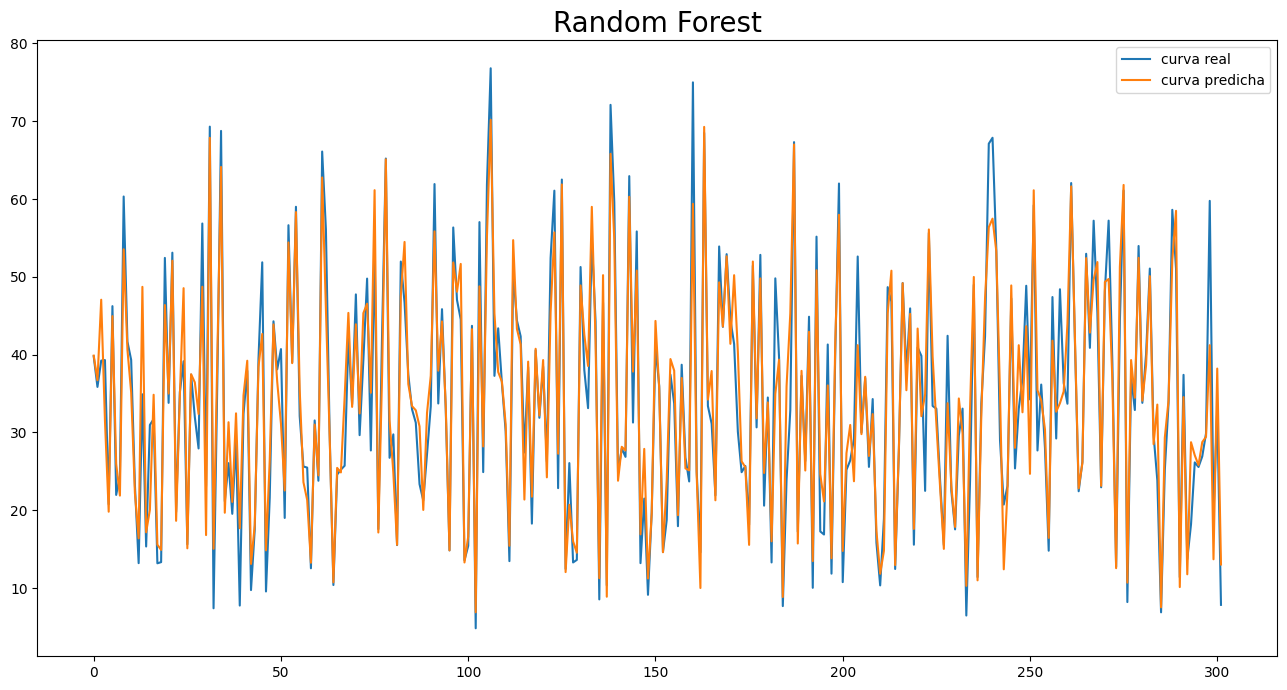

In [26]:
# Comparación de la salida real vs predicha
plt.figure(figsize=(16,8))

# Crearemos una trama usando datos etiquetados (los reales del dataset)
plt.plot(np.arange(len(X_test)), y_test.values, label='curva real')

# Crearemos una trama usando datos predichos
plt.plot(np.arange(len(X_test)), pred_rf, label='curva predicha')

plt.title('Random Forest', fontsize=20)
plt.legend()

# La superposición de la curva verdadera y la curva predicha muestra que la
# varianza de la regresión aleatoria es menor que la de la regresión lineal.

In [27]:
# Construimos un DataFrame para visulizar qué importancia le da el modelo a cada variable
df_importancia = pd.DataFrame(data=rf.feature_importances_, index=X.columns, columns=['Valores'])
df_importancia

,Valores
cement,0.282875
slag,0.078841
flyash,0.019970
water,0.116406
superplasticizer,0.087330
coarseaggregate,0.029938
fineaggregate,0.036971
age,0.347669


Como podemos ver, la edad de la característica de entrada y el cemento son más importantes que otros para predecir la resistencia a la compresión.

(**NOTA: el Ing. Civil podrá asesorar sobre si esto es así o no en la realidad, los datos lo indican al menos**)

## ¿Cómo saber qué parámetros llevan a un modelo óptimo?

Haremos una búsqueda en cuadrícula (**GridSearchCV**) para encontrar los mejores parámetros para la regresión aleatoria de bosques

In [28]:
# número de árboles en un bosque aleatorio
n_estimators = np.arange(50, 500, 25)
# número de características a considerar al buscar la mejor división
max_features = ['sqrt', 'log2']
# número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [2, 4]
# número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2]
# método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]

NOTA: estos parámetros son evidentes si se conoce a profundidad el funcionamiento del método.

De forma rápida, Ctrl+Click sobre la clase, abre la documentación.

In [29]:
# Crearemos una grilla de parámetros
param_grid = {
            "n_estimators" : n_estimators,
            "max_features" : max_features,
            "min_samples_split" : min_samples_split,
            "min_samples_leaf" : min_samples_leaf,
            "bootstrap" : bootstrap
            }

In [30]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
# Se prepara el objeto encargado de probar las combinaciones elegidas
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
                # cv: cross-validation, Para entradas de int/None, si el estimador es un clasificador y y es binario o multiclase, se utiliza StratifiedKFold. En todos los demás casos, se utiliza KFold
                # n_jobs: Número de trabajos a ejecutar en paralelo. None significa 1 a menos que esté en un contexto joblib.parallel_backend. -1 significa usar todos los procesadores.

In [31]:
rf_grid.fit(X_train, y_train) # Tarda unos 4 min

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475])},
             verbose=2)

In [ ]:
# Obtendremos los mejores parámetros
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 375}

In [ ]:
# Creamos el modelo con los parámetros óptimos (del espacio que buscamos)
rf_tuneado = RandomForestRegressor(**rf_grid.best_params_)  # Acá entra el desempaquetado del diccionario para los parámetros (**)

In [ ]:
rf_tuneado.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=375)

In [ ]:
pred_rf_tuneado = rf_tuneado.predict(X_test)

In [ ]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf_tuneado)))
print('R squared: ', r2_score(y_test, pred_rf_tuneado))

RMSE:  4.379766080213701
R squared:  0.9218278089456373


Aumentamos el ajuste en **2 puntos porcentuales**.
Este proceso de encontrar los parámetros óptimos, se llama *Fine-Tuning*, justamente por eso.

## Cola de algoritmos de interés

### *Pipeline*

https://valohai.com/machine-learning-pipeline/

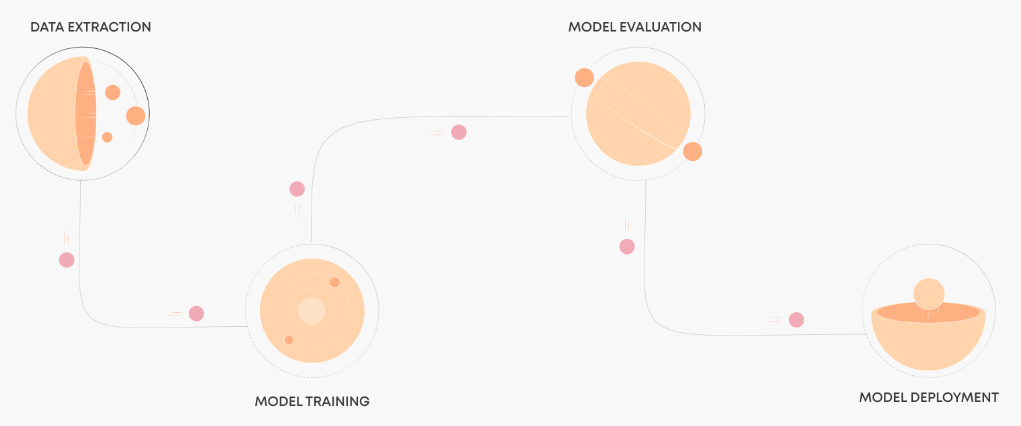

Una canalización de aprendizaje automático es una forma de codificar y automatizar el flujo de trabajo necesario para producir un modelo de aprendizaje automático. Las canalizaciones de aprendizaje automático constan de varios pasos secuenciales que hacen de todo, desde la extracción y el preprocesamiento de datos hasta el entrenamiento y la implementación de modelos.

Para los equipos de ciencia de datos, el canal de producción debe ser el producto central. Encapsula todas las mejores prácticas aprendidas para producir un modelo de aprendizaje automático para el caso de uso de la organización y permite que el equipo se ejecute a escala. Ya sea que mantenga varios modelos en producción o admita un solo modelo que debe actualizarse con frecuencia, una canalización de aprendizaje automático de extremo a extremo es imprescindible.

In [32]:
from sklearn.pipeline import Pipeline

# Específicas para procesar datos
from sklearn.impute import SimpleImputer            # Para imputar
from sklearn.preprocessing import StandardScaler    # Escalado

In [33]:
# Etapa de procesamiento de los datos, se encadenan las acciones a realizar sobre los datos que "llegan"
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('standarize', StandardScaler())
])

In [34]:
# Operación sobre el modelo a entrenar, incluyendo la aplicación previa de preprocesamiento de los datos que "llegan"
# Pipeline lo gestiona todo
def prepare_model(algorithm, X_train, y_train):
    model = Pipeline(steps=[
        ('preprocessing', num_pipeline),
        ('algorithm', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

### Algoritmos

In [36]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), BaggingRegressor(), SVR(),
             DecisionTreeRegressor(), ExtraTreeRegressor(), LinearRegression(), SGDRegressor(), KNeighborsRegressor(),
             ]

### Proceso y guardado de características para análisis

In [38]:
# Listas para ir guardando los valores de cada algoritmo
names = []
times = []
mses = []
maes = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    print("Procesando: ", name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end_time = time.time()
    times.append(end_time - start_time)
    mses.append(mean_squared_error(y_test, pred))
    maes.append(mean_absolute_error(y_test, pred))

Procesando:  RandomForestRegressor
Procesando:  AdaBoostRegressor
Procesando:  GradientBoostingRegressor
Procesando:  BaggingRegressor
Procesando:  SVR
Procesando:  DecisionTreeRegressor
Procesando:  ExtraTreeRegressor
Procesando:  LinearRegression
Procesando:  SGDRegressor
Procesando:  KNeighborsRegressor


### Comparación

In [39]:
results_dict = {'Algoritmo': names, 'MSE': mses, 'MAE': maes, 'Tiempo': times}
# Podemos construir y ordenar el DataFrame en base al parámetro que nos interesa
pd_models_performance = pd.DataFrame(results_dict).sort_values(by='MSE', ascending=1)

In [40]:
pd_models_performance.style.background_gradient(cmap='coolwarm')

,Algoritmo,MSE,MAE,Tiempo
2,GradientBoostingRegressor,21.825624,3.563567,0.156128
0,RandomForestRegressor,22.719900,3.436166,0.399996
3,BaggingRegressor,27.261609,3.898400,0.054189
5,DecisionTreeRegressor,37.988996,4.197748,0.011905
1,AdaBoostRegressor,61.306898,6.461002,0.123880
6,ExtraTreeRegressor,63.763772,5.422517,0.012685
9,KNeighborsRegressor,74.591327,6.652954,0.011994
7,LinearRegression,93.677769,7.589372,0.012060
8,SGDRegressor,94.889800,7.663450,0.013080
4,SVR,98.293416,7.689885,0.046961


## Normalizado de Características

### Funciones Generales

In [ ]:
def diagnostic_plots(concrete_data, variable, csMPa='csMPa'):
    """
    Compara 2 variables del dataset
    concrete_data: dataframe completo
    variable: 1er variable
    csMPa: 2da variable, la salida por defecto
    """
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 4, 1)
    skew = concrete_data[variable].skew()
    sns.histplot(concrete_data[variable], kde= True, stat="density",
                 label='Sesgo = %.3f' %(skew), bins=30, color = 'r')
    plt.legend(loc='best')
    plt.title('Histograma')

    plt.subplot(1, 4, 2)
    plt.scatter(concrete_data[variable], concrete_data['csMPa'], color = 'g')
    plt.title('Gráfico de Dispersión')

    plt.subplot(1, 4, 3)
    sns.boxplot(y=concrete_data[variable], color = 'b')
    plt.title('Diagrama de Caja')

    plt.subplot(1, 4, 4)
    sns.barplot(x = csMPa, y = variable, data = concrete_data)
    plt.title('Gráfico de Barras')
    plt.show()

### Procedimientos Típicos

In [ ]:
dataset = pd.read_csv("dataset_hormigon_regresion.csv")
dataset.drop_duplicates(inplace=True)
dataset

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalización de columnas
scaler = MinMaxScaler()
dataset_norm = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
dataset_norm

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264,0.522860
...,...,...,...,...,...,...,...,...,...
1000,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176,0.522611
1001,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426,0.074176,0.359412
1002,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633,0.074176,0.266226
1003,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961,0.074176,0.379220


In [ ]:
dataset_norm.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,0.403268,0.200455,0.277543,0.481432,0.187368,0.504002,0.448290,0.123233,0.410121
std,0.238229,0.239763,0.320879,0.170442,0.183850,0.225522,0.201557,0.175095,0.202875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.202511,0.000000,0.000000,0.357827,0.000000,0.380814,0.326894,0.016484,0.263984
50%,0.372146,0.055648,0.000000,0.510383,0.189441,0.485465,0.466633,0.074176,0.392052
75%,0.563927,0.396494,0.591204,0.567891,0.310559,0.668605,0.572504,0.151099,0.529961
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarización por Z-score
scaler = StandardScaler()
dataset_stan = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
dataset_stan

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,0.846302,-1.204081,-0.280312,2.748689
1,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,1.039748,-1.204081,-0.280312,1.636671
2,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,3.518569,0.308393
3,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,5.009865,0.356314
4,-0.767375,0.700778,-0.865375,0.465320,-1.019640,0.051885,0.657677,4.931375,0.555986
...,...,...,...,...,...,...,...,...,...
1000,-0.021395,0.510363,0.541693,-0.116056,0.484495,-1.344795,-0.054648,-0.280312,0.554757
1001,0.417755,-0.836471,0.935921,0.652861,0.738001,-2.017987,0.506993,-0.280312,-0.250074
1002,-1.247756,0.782052,0.826846,0.498140,0.011284,-1.057205,0.091055,-0.280312,-0.709626
1003,-1.146118,1.331235,-0.865375,-0.303597,0.890104,0.196324,0.201889,-0.280312,-0.152388


In [ ]:
dataset_stan.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03
mean,-2.121023e-16,1.131212e-16,5.656062e-17,-8.201289e-16,-8.484092e-17,1.187773e-15,1.307964e-16,-3.535038e-17,-1.979622e-16
std,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00
min,-1.693618e+00,-8.364707e-01,-8.653750e-01,-2.826018e+00,-1.019640e+00,-2.235936e+00,-2.225246e+00,-7.041542e-01,-2.022545e+00
25%,-8.431237e-01,-8.364707e-01,-8.653750e-01,-7.255629e-01,-1.019640e+00,-5.465081e-01,-6.025901e-01,-6.099671e-01,-7.206848e-01
50%,-1.307032e-01,-6.042579e-01,-8.653750e-01,1.699435e-01,1.128375e-02,-8.223793e-02,9.105479e-02,-2.803121e-01,-8.910756e-02
75%,6.747251e-01,8.180450e-01,9.779928e-01,5.075166e-01,6.703992e-01,7.302348e-01,6.165811e-01,1.592278e-01,5.910052e-01
max,2.506116e+00,3.336392e+00,2.252612e+00,3.044003e+00,4.422287e+00,2.200424e+00,2.738611e+00,5.009865e+00,2.909041e+00


### Evaluación

**CEMENTO**

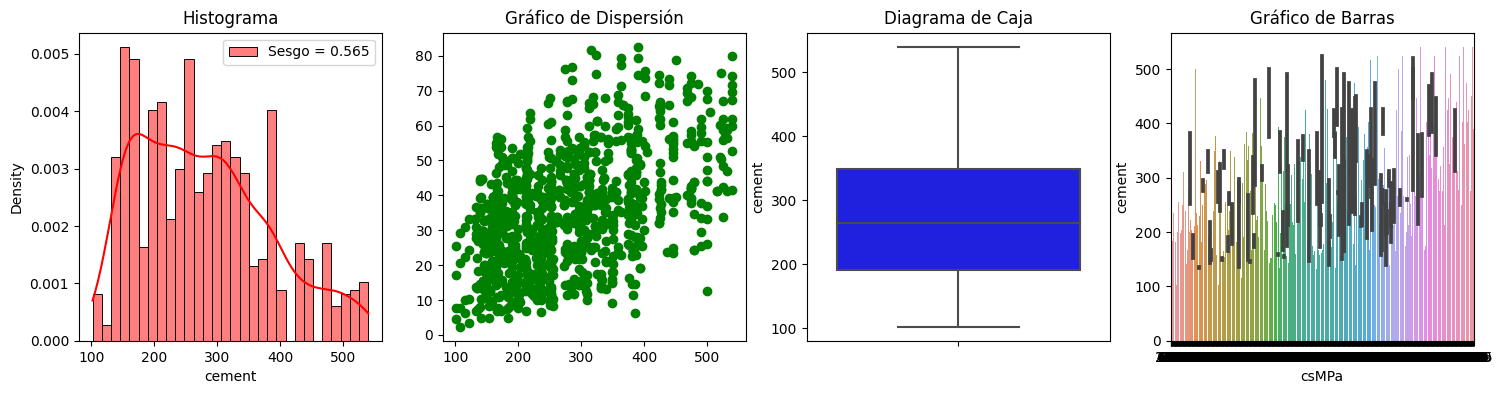

In [ ]:
# csMPa Vs cement
# Original Dataset
diagnostic_plots(dataset, 'cement','csMPa')

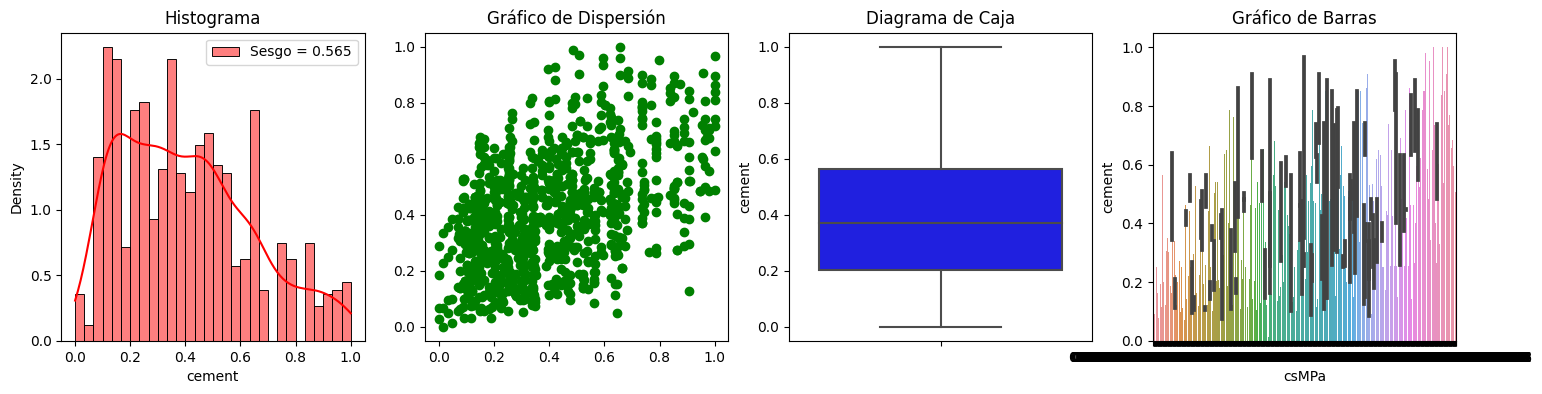

In [ ]:
# Normalizado Dataset
diagnostic_plots(dataset_norm, 'cement','csMPa')

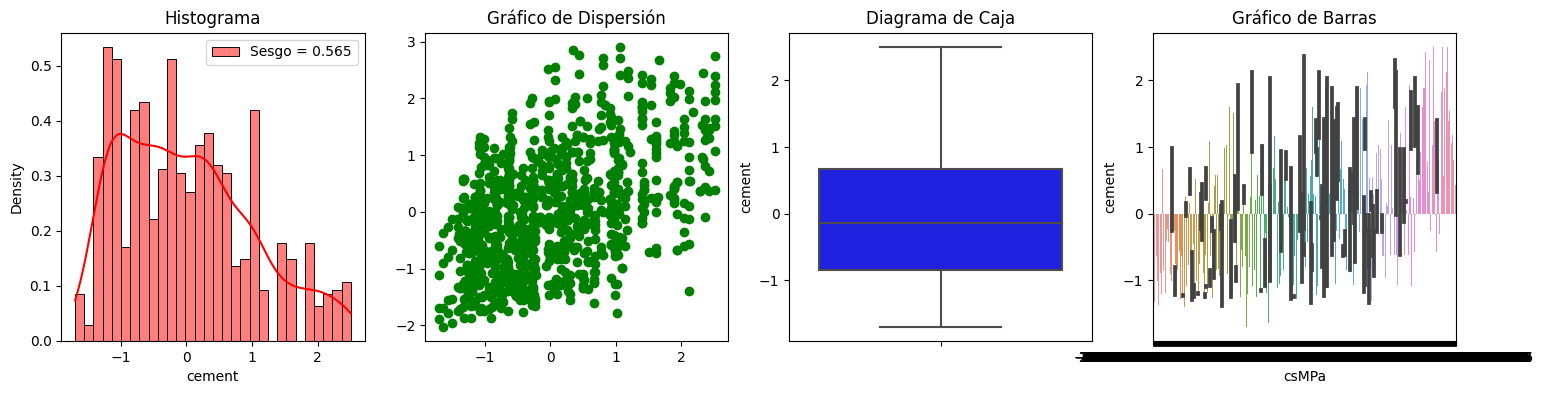

In [ ]:
# Estandarizado Dataset
diagnostic_plots(dataset_stan, 'cement','csMPa')

**SUPERPLASTIFICANTE**

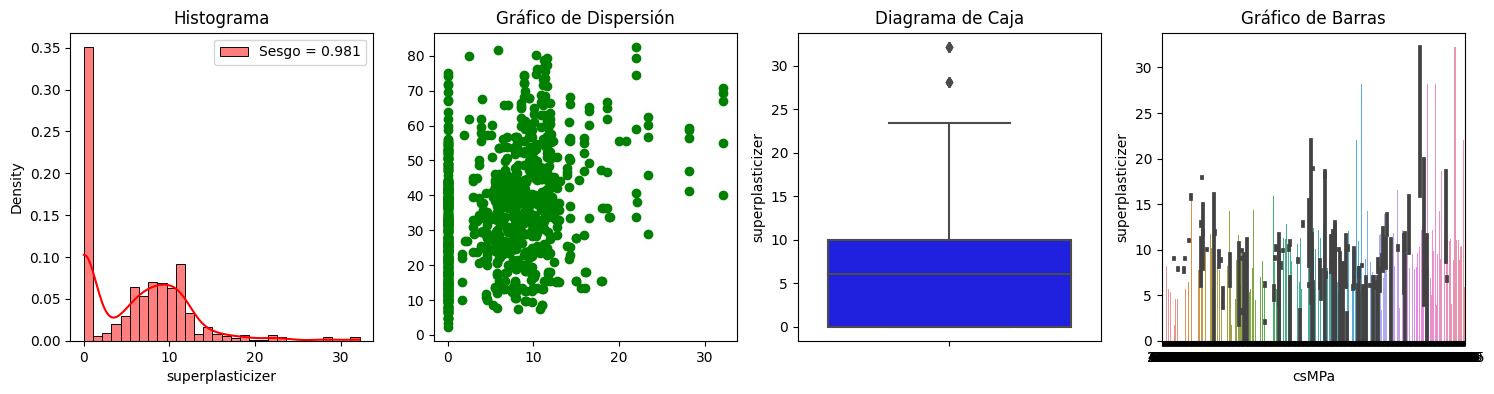

In [ ]:
# csMPa Vs superplasticizer
# Original Dataset
diagnostic_plots(dataset, 'superplasticizer','csMPa')

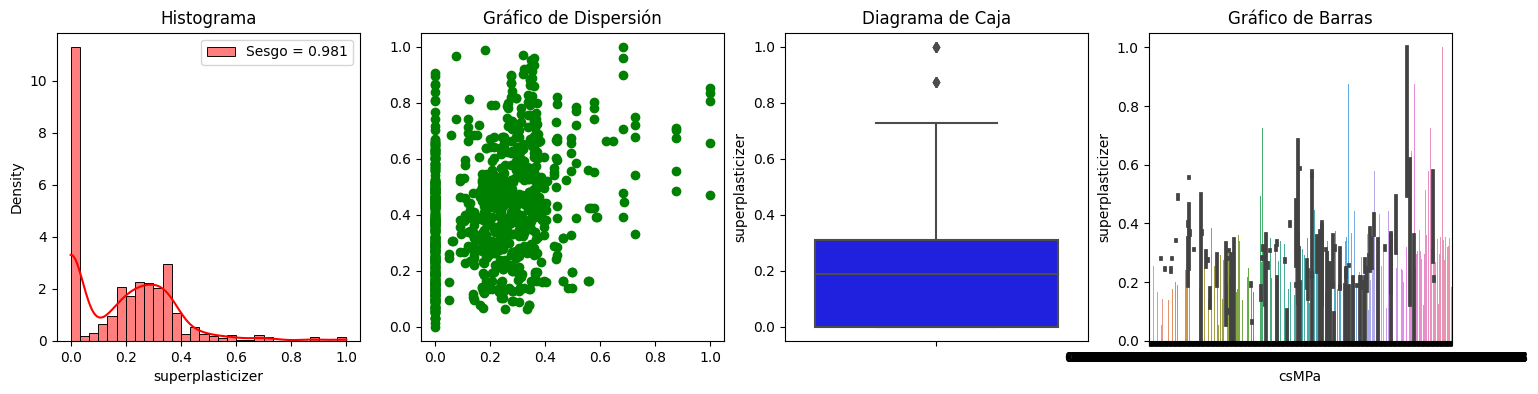

In [ ]:
# Normalizado Dataset
diagnostic_plots(dataset_norm, 'superplasticizer','csMPa')

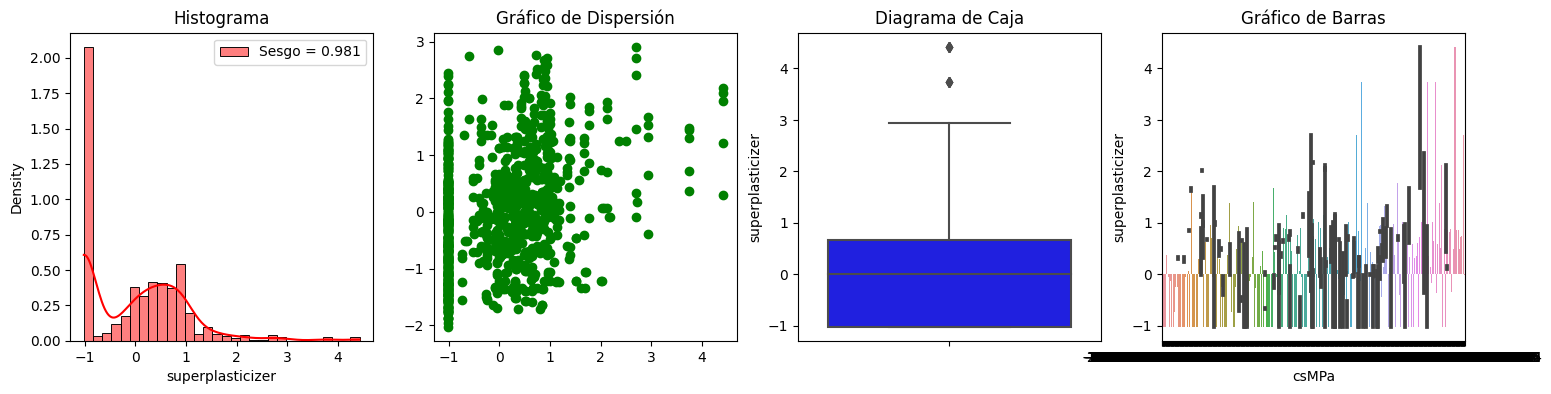

In [ ]:
# Estandarizado Dataset
diagnostic_plots(dataset_stan, 'superplasticizer','csMPa')

# Plus: LazyPredict - para regresión

Cuando nos enfrentamos a un proyecto de *Machine Learning*, tenemos que hacer un análisis de datos e intentar escoger el modelo/modelos que mejor se ajusten a nuestro dataset. Que como ya sabemos, no todos los modelos son óptimos para todo tipo de datos.

Van unos ejemplos:

* Para datos con una relación lineal funcionan bien los modelos lineales como la regresión logística, regresión lineal etc.
* Para datos con la mayoría de variables continuas son buenos los modelos como Gaussian Naive Bayes, regresiones lineales, SVM…
* Para datos un poco más "caóticos" podemos intentar algoritmos por árboles como Random Forest, algoritmos por boosting como GBM o el xGBoost etc.

Aquí es donde entra en juego esta librería y otras tantas con el mismo objetivo. *LazyPredict* nos permite, con una línea, lanzar una barbaridad de modelos de scikit-Learn con los parámetros por defecto para ver el rendimiento de cada uno de ellos. Esto nos da la ventaja de ver el rendimiento de cada uno de ellos para nuestros datos y poder enfocarnos en optimizar, agrupar, intervenir aquellos que mejor funcionan para nuestros datos.

Librería: https://lazypredict.readthedocs.io/en/latest/index.html

In [41]:
pip install lazypredict

In [42]:
from lazypredict.Supervised import LazyRegressor

clf_lazy = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf_lazy.fit(X_train, X_test, y_train, y_test)
models

 98%|█████████▊| 41/42 [00:14<00:00,  3.13it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 703, number of used features: 8
[LightGBM] [Info] Start training from score 35.724765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:14<00:00,  2.87it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.93,0.93,4.22,0.40
HistGradientBoostingRegressor,0.92,0.93,4.29,6.24
ExtraTreesRegressor,0.92,0.92,4.40,0.48
XGBRegressor,0.92,0.92,4.42,1.78
GradientBoostingRegressor,0.91,0.91,4.67,0.42
RandomForestRegressor,0.90,0.91,4.78,0.95
BaggingRegressor,0.89,0.90,5.04,0.11
ExtraTreeRegressor,0.83,0.83,6.39,0.04
DecisionTreeRegressor,0.83,0.83,6.44,0.03


In [43]:
lbmb_lazy = clf_lazy.models.get("LGBMRegressor")    # Recupero el modelo que me interesa...

In [44]:
# Si miramos el modelo, vamos a ver que hay otras cosas metidas. Es el típico Pipeline del que hablábamos arriba
lbmb_lazy

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'],
      dtype='object')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object')),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index([], dtype='object'))])),
                ('regressor', LGBMRegressor(random_state=42))])

# Referencias y Recursos



*   https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
*   [Lazy Predict’s](https://lazypredict.readthedocs.io/en/latest/)
